<a href="https://colab.research.google.com/github/AnshGoyal13/time-series-analysis/blob/main/Ansh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Prophet
!pip install yfinance prophet

# For LSTM and other models
!pip install numpy pandas matplotlib seaborn plotly scikit-learn statsmodels


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


[*********************100%***********************]  1 of 1 completed


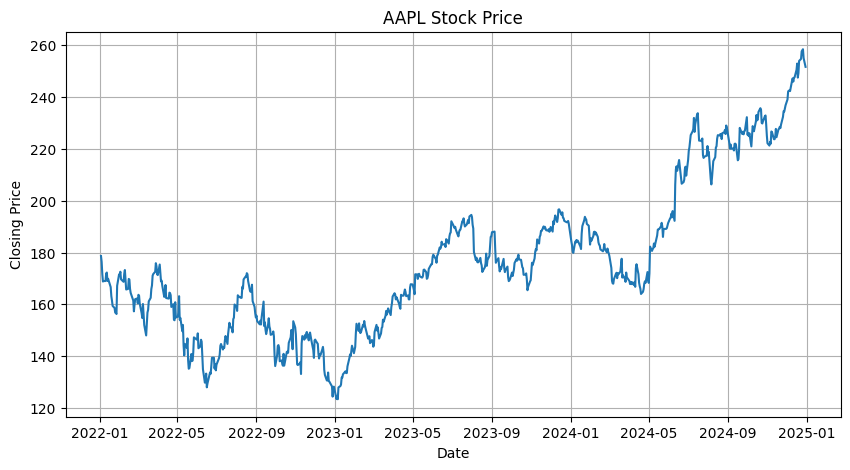

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download data
df = yf.download('AAPL', start='2022-01-01', end='2024-12-31', auto_adjust=True)

# Reset index to get 'Date' as a column
df.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title("AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()



In [4]:
df = yf.download('AAPL', start='1962-01-01', end='2025-06-05', auto_adjust=True)

df = df[['Close']]
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.head()
df.shape

[*********************100%***********************]  1 of 1 completed


(11210, 2)

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model_arima = ARIMA(df['Close'], order=(5, 1, 0))  # You can tweak (p,d,q) as needed
results_arima = model_arima.fit()


In [6]:
# Predict last 200 values
pred_arima = results_arima.predict(start=len(df)-200, end=len(df)-1, typ='levels')
actual_arima = df['Close'].iloc[-200:]

# RMSE Calculation
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_arima = evaluate_rmse(actual_arima, pred_arima)
print("✅ ARIMA RMSE:", rmse_arima)



✅ ARIMA RMSE: 4.368839994186823


ADF Statistic: 2.106425710551625
p-value: 0.9987962418864109


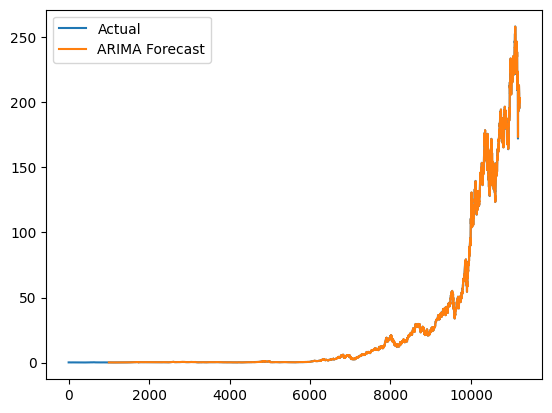

In [7]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fit ARIMA
model_arima = ARIMA(df['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()
pred_arima = model_arima_fit.predict(start=1000, end=len(df)-1, typ='levels')

# Plot
plt.plot(df['Close'], label='Actual')
plt.plot(pred_arima, label='ARIMA Forecast')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


<Figure size 800x400 with 0 Axes>

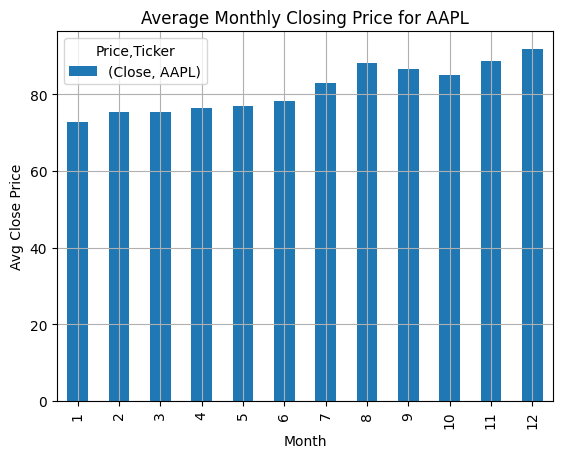

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 AAPL   No. Observations:                 2264
Model:             SARIMAX(2, 1, 2)x(2, 1, [1], 12)   Log Likelihood               -4483.203
Date:                              Fri, 18 Jul 2025   AIC                           8982.406
Time:                                      19:45:32   BIC                           9028.066
Sample:                                           0   HQIC                          8999.081
                                             - 2264                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4247      0.281      5.070      0.000       0.874       1.975
ar.L2         -0.55

<Figure size 1000x500 with 0 Axes>

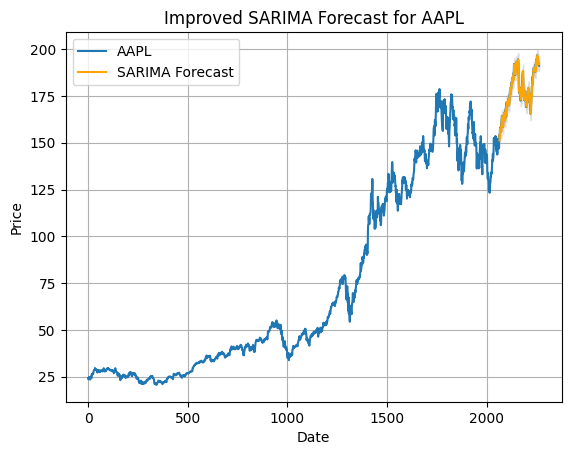

SARIMA RMSE: 2.098870383213968
SARIMA RMSE: 2.098870383213968


In [8]:
# ================== 1. Install and Import ==================
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# ================== 2. Load AAPL Stock Data ==================
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31', auto_adjust=True)
df = df[['Close']].copy()
df.dropna(inplace=True)
df.reset_index(inplace=True)

# ================== 3. Check Seasonality ==================
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(8, 4))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Closing Price for AAPL')
plt.xlabel('Month')
plt.ylabel('Avg Close Price')
plt.grid(True)
plt.show()

# ================== 4. Improved SARIMA Model ==================
sarima_model = SARIMAX(df['Close'],
                       order=(2,1,2),
                       seasonal_order=(2,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()
print(sarima_result.summary())

# ================== 5. Forecast Next 200 Days ==================
pred_start = len(df) - 200
pred = sarima_result.get_prediction(start=pred_start, dynamic=False)
pred_ci = pred.conf_int()

# ================== 6. Plot Forecast ==================
plt.figure(figsize=(10, 5))
ax = df['Close'].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='SARIMA Forecast', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Improved SARIMA Forecast for AAPL")
plt.legend()
plt.grid(True)
plt.show()

# ================== 7. Evaluate RMSE ==================
y_true = df['Close'].iloc[pred_start:]
y_pred = pred.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("SARIMA RMSE:", rmse)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("SARIMA RMSE:", rmse)
rmse_sarima = rmse



[*********************100%***********************]  1 of 1 completed

Price   Ticker
Date              datetime64[ns]
Close   AAPL             float64
High    AAPL             float64
Low     AAPL             float64
Open    AAPL             float64
Volume  AAPL               int64
dtype: object
Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2015-01-02  24.288586  24.757340  23.848711  24.746232  212818400
1      2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2      2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
3      2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
4      2015-01-08  24.857307  24.915069  24.148621  24.266367  237458000

Before conversion:
ds    datetime64[ns]
y            float64
dtype: object
          ds          y
0 2015-01-02  24.288586
1 2015-01-05  23.604332
2 2015-01-06  23.606554
3 2015-01-07  23.937571
4 2015-01-08  24.857307



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphyt50g0y/bf5f4xb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphyt50g0y/sm4hqx8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99065', 'data', 'file=/tmp/tmphyt50g0y/bf5f4xb2.json', 'init=/tmp/tmphyt50g0y/sm4hqx8_.json', 'output', 'file=/tmp/tmphyt50g0y/prophet_model5s59aebx/prophet_model-20250718194533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:45:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


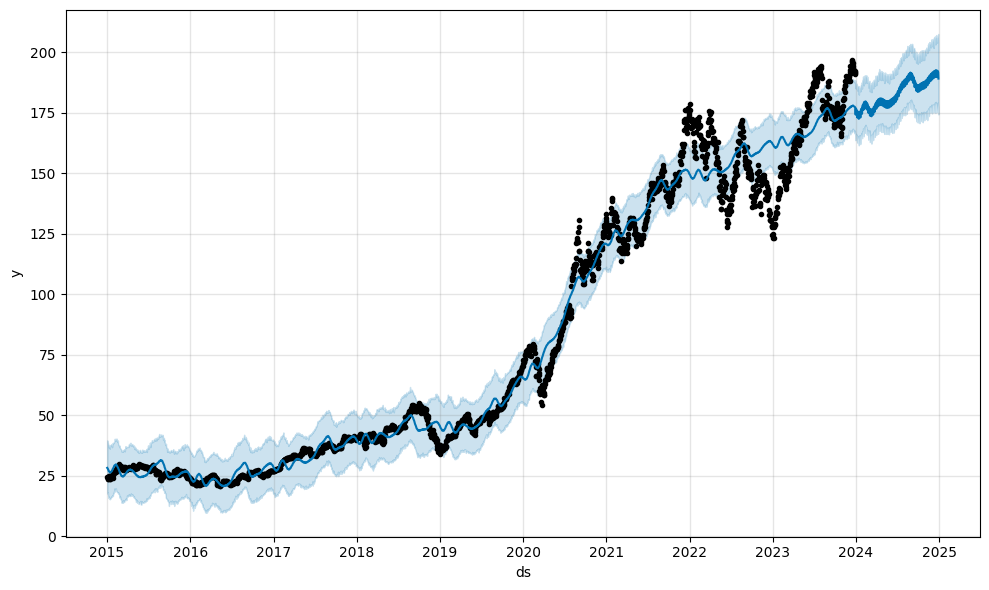

In [9]:
import pandas as pd
from prophet import Prophet
import yfinance as yf

# 1. Load data (with auto_adjust=True for correct values)
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31', auto_adjust=True)

# 2. Reset index to bring 'Date' as a column
df.reset_index(inplace=True)

# 3. Print to debug
print(df.dtypes)
print(df.head())

# 4. Create Prophet-compatible DataFrame
df_prophet = df[['Date', 'Close']].copy()
df_prophet.columns = ['ds', 'y']

# Print again to confirm
print("\nBefore conversion:")
print(df_prophet.dtypes)
print(df_prophet.head())

# 5. Convert
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet['y'] = df_prophet['y'].astype(float)

# 6. Drop NaNs just in case
df_prophet.dropna(inplace=True)

# 7. Fit model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# 8. Forecast
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)

# 9. Plot
model_prophet.plot(forecast);  # <- semicolon suppresses extra output



In [10]:
# Last 365 days actual vs forecasted
actual_prophet = df_prophet['y'][-365:].values
pred_prophet = forecast['yhat'][-365:].values

rmse_prophet = evaluate_rmse(actual_prophet, pred_prophet)
print("✅ Prophet RMSE:", rmse_prophet)


✅ Prophet RMSE: 24.317667509982936


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - loss: 0.0320
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 4.1374e-04
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - loss: 3.7420e-04
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 4.1111e-04
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 3.8459e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


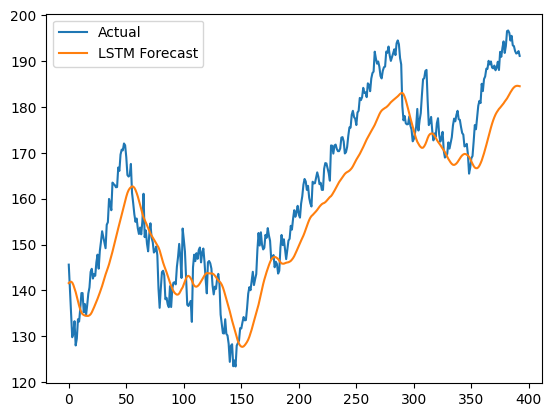

In [11]:
# Prepare data
from sklearn.preprocessing import MinMaxScaler

data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Build LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Predict
X_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])
X_test = np.array(X_test)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot
real_prices = scaler.inverse_transform(test_data[60:])
plt.plot(real_prices, label='Actual')
plt.plot(predictions, label='LSTM Forecast')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define RMSE function
def evaluate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# real_prices = actual values
# predictions = predicted values
rmse_lstm = evaluate_rmse(real_prices, predictions)
print("✅ LSTM RMSE:", rmse_lstm)


✅ LSTM RMSE: 8.228667876513253


In [13]:
print("\n📊 Final RMSE Comparison (Lower is Better):")
print(f"ARIMA   : {rmse_arima:.4f}")
print(f"SARIMA  : {rmse_sarima:.4f}")
print(f"Prophet : {rmse_prophet:.4f}")
print(f"LSTM    : {rmse_lstm:.4f}")



📊 Final RMSE Comparison (Lower is Better):
ARIMA   : 4.3688
SARIMA  : 2.0989
Prophet : 24.3177
LSTM    : 8.2287
